In [1]:
import sklearn
import numpy as np
import os
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

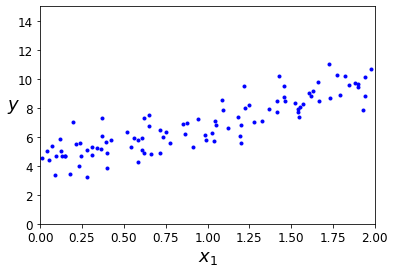

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### 식 4-4: 정규 방정식  
sklearn이 아닌 행렬식으로 직접 구현

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

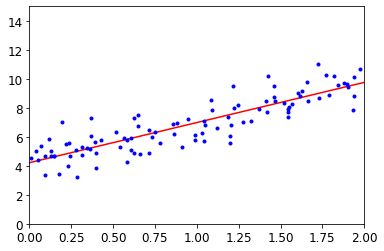

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

행렬식이 아닌 sklearn 내장 함수로 구현

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{+}\hat{y}$

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# 배치 경사 하강법을 사용한 선형 회귀
식 4-6: 비용 함수의 그레이디언트 벡터

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

식 4-7: 경사 하강법의 스텝

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [12]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
y_predict,X_new_b.dot(theta)

(array([[4.21509616],
        [9.75532293]]),
 array([[4.21509616],
        [9.75532293]]))

In [15]:
theta_path_bgd = []
style_list = ['r--','y--','g--','b--']

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = style_list[iteration] if iteration < 4 else 'b-'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

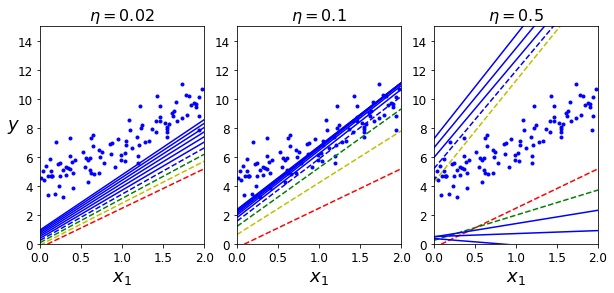

In [16]:
theta = np.random.randn(2,1)

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# 확률적 경사 하강법

In [17]:
theta_path_sgd = []
m = len(X_b)

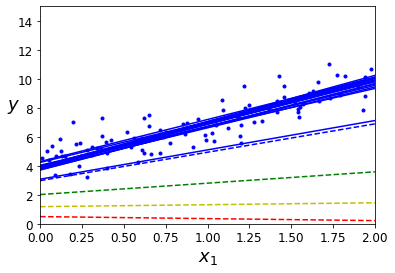

In [18]:
n_epochs = 50
t0, t1 = 5, 50
np.random.seed(42)
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = style_list[i] if i < 4 else 'b-'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show() 

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# 미니배치 경사 하강법

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

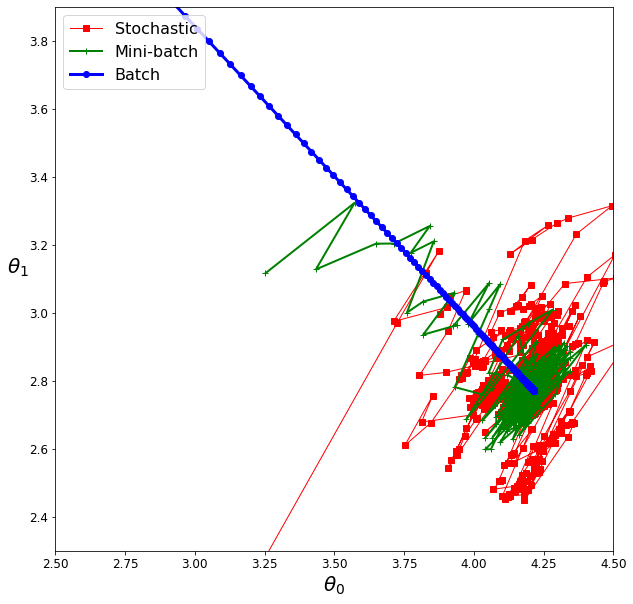

In [25]:
plt.figure(figsize=(10,10))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# 규제가 있는 모델

In [26]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### 식 4-8: 릿지 회귀의 비용 함수

$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2 $

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [28]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

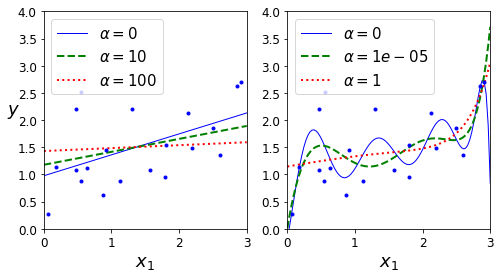

In [29]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### 식 4-10: 라쏘 회귀의 비용 함수

$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| $

C:\Users\kang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


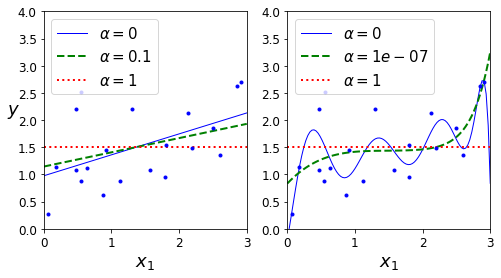

In [30]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()


In [31]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 식 4-12: 엘라스틱넷 비용 함수

$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2} $


### 식 4-16: 하나의 훈련 샘플에 대한 비용 함수

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) &amp; \text{if } y = 1, \\
  -\log(1 - \hat{p}) &amp; \text{if } y = 0.
\end{cases}
$

### 식 4-17: 로지스틱 회귀 비용 함수(로그 손실)

$ J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} $

### 식 4-18: 로지스틱 비용 함수의 편도 함수

$ \dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)} $

# MNIST 를 이용한 이미지 분류기

In [32]:
import tensorflow as tf
from tensorflow import keras
# mnist data set load.

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [33]:
#훈련 세트는 60000개의 흑백 이미지. 각 크기는 28x28 픽셀
X_train_full.shape

(60000, 28, 28)

In [34]:
# 훈련세트와 검증세트를 8:2 비율로 나누는 것이 좋음(일반적)
# 여기서는 훈련세트 55000장, 검증세트 5000장으로 설정했음
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

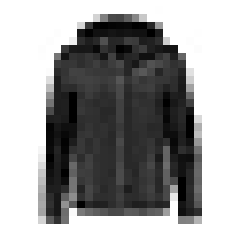

In [35]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [36]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [37]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [38]:
class_names[y_train[0]]

'Coat'

In [39]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [40]:
X_test.shape

(10000, 28, 28)

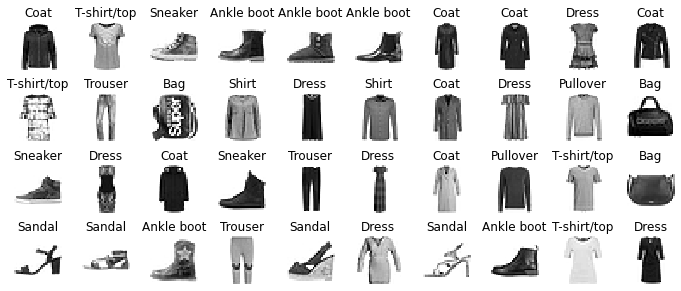

In [41]:
# 데이터 셋에 있는거 몇개만 출력해봄
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [73]:
# 모델 만들기. 여러가지 방법이 있음.
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

input_A = keras.layers.Input(shape=[28,28])
input_ = keras.layers.Flatten()(input_A)
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
output = keras.layers.Dense(10, activation = 'softmax')(hidden2)
model3 = keras.models.Model(inputs=[input_A], outputs=[output])


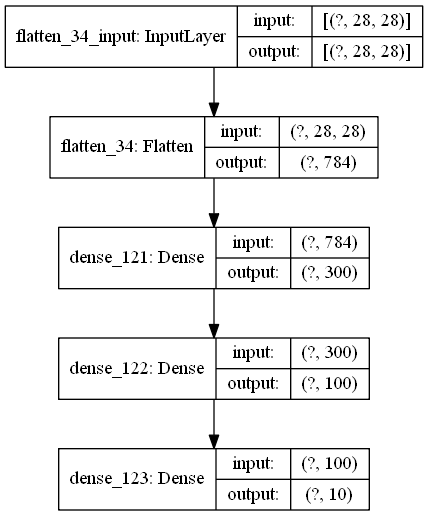

In [74]:
keras.utils.plot_model(model1, 'a.png', show_shapes=True)

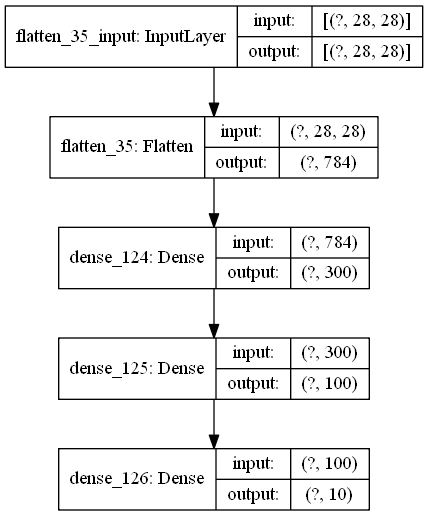

In [75]:
keras.utils.plot_model(model2, 'a.png', show_shapes=True)

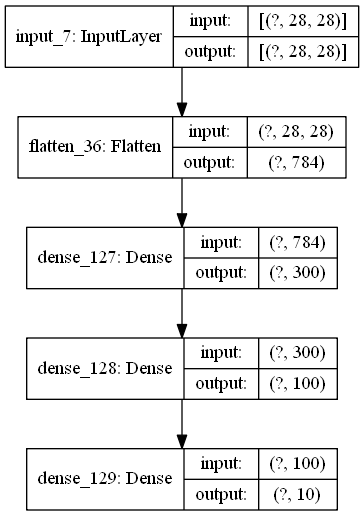

In [76]:
keras.utils.plot_model(model3, 'a.png', show_shapes=True)

In [77]:
model = model1
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_122 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_123 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [79]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7160 - accuracy: 0.7641 - val_loss: 0.5111 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4897 - accuracy: 0.8286 - val_loss: 0.4576 - val_accuracy: 0.8404
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4457 - accuracy: 0.8435 - val_loss: 0.4052 - val_accuracy: 0.8660
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4177 - accuracy: 0.8538 - val_loss: 0.3967 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3975 - accuracy: 0.8597 - val_loss: 0.3983 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3812 - accuracy: 0.8653 - val_loss: 0.3859 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8705 - val_loss: 0.3860 - val_accuracy:

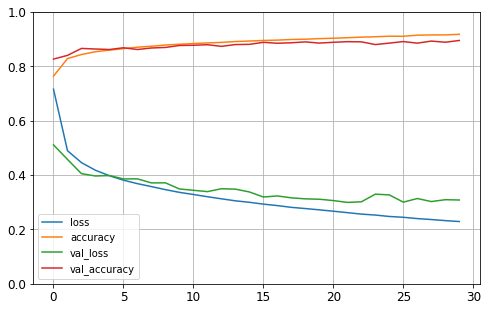

In [80]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [81]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8768


[0.3464455306529999, 0.876800000667572]

In [86]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)
y_proba

array([[9.6869906e-07, 3.2202772e-07, 1.0147101e-05, 3.4311968e-06,
        7.1518766e-06, 8.6498763e-03, 4.6144951e-06, 1.2924971e-02,
        1.9017411e-04, 9.7820836e-01],
       [1.6537611e-04, 2.2677265e-09, 9.8354071e-01, 3.5297596e-08,
        1.1128652e-02, 2.1050901e-10, 5.1646098e-03, 5.1566082e-12,
        5.5325893e-07, 1.1917818e-10],
       [1.8076842e-05, 9.9997854e-01, 6.6434450e-07, 1.6336462e-06,
        8.4807112e-07, 2.6518792e-12, 2.0682690e-07, 5.7402043e-12,
        1.6273213e-09, 1.6827146e-11]], dtype=float32)

In [83]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)